$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\pr}{\mathbf{p}}$



# Discussion 5: Sum of Largest Three Dice
### Problem 
        Assume that four (fair) dice are rolled, with the outcomes:
$$ X_1,X_2,X_3,X_4 \sim \mathcal{U}(\{1,\ldots,6\}) $$
        Let $Z$ be the sum of the <b> three largest</b> outcomes.
        Find $\E(Z)$.
***

### Solution (Theoretical part)

<ul>
<li>  we can write 
      $$Z= X_1+X_2+X_3+X_4-Y $$ 
        where
        $$ Y = \min_k X_k$$ 
        so that 
        $$\E(Z) = \E(X_1)+\E(X_2)+\E(X_3)+\E(X_4) - \E(Y)$$
</li>

<li> As $\E(X_k)=3.5$ for all $k=1,\ldots,4$, it boils down to computing $\E(Y)$. </li>
<li> To find $\E(Y)$, we first need to determine its PMF. </li>
<li> Clearly, $\text{Im}(Y) = \{1,\ldots,6\}$ as $1\leq \min_k (X_k) \leq 6$. </li>
<li> Finding $\pr(X=k)$ involves some combinatorial analysis. Here are two solutions:
    <ol> 
        <li> <b> Option 1: </b>
            <ul> 
                <li> First note that
                    $$ \pr(Y\geq k) = \frac{(7-k)^4}{6^4} $$
                    as each entry $X_k$ should be picked only from $|\{k,k+1,\ldots,6\}|=7-k$
                </li>
                <li> Then $$ \pr(Y>k) = \frac{(6-k)^4}{6^4} $$, as $X_k$ 
                        must be picked from $|\{k+1,\ldots,6\}|=6-k$ </li> 
                <li> We have the disjoint union:
                    $$ \{Y\geq k\} = \{Y=k\}\cup \{Y>k\} $$ 
                (i.e. all events in which $Y=k$ and all events in which $Y>k$).		
                Therefore
                    $$ \pr(Y\geq k) = \pr(Y=k)+ \pr(Y>k) $$
                and if we rearrange it, we get
                    \begin{align*}
                    \pr(Y=k)&= \pr(Y\geq k)-\pr(Y>k) \\
                            &= \boxed{\frac{1}{6^4}\Big((7-k)^4 - (6-k)^4\Big)}
                    \end{align*}
                </li>
            </ul> 
        </li>  
        <li> <b> Option 2: </b> 
        If $Y=k$, list all $4$-tuples $(X_1,\ldots,X_4$ such that $Y=\min_i(X_i)=k$. This can be
        done in the following four distinct ways:
		\begin{align*}
		E_1&=\{ (k,X_2,X_3,X_4)~|~ X_2,X_3,X_4 > k \},& \text{ up to } {4 \choose 1} \text{ permutations}\\
		E_2&=\{ (k,k,X_3,X_4)~|~ X_3,X_4 > k \} & \text{ up to } {4 \choose 2} \text{ permutations}\\
		E_3&=\{ (k,k,k,X_4)~|~ X_4 > k\} & \text{ up to } {4 \choose 3} \text{ permutations}\\
		E_4&=\{ (k,k,k,k) \}& \text{ no permutations}
		\end{align*}
		Overall we have
        \begin{align*}
        L_k&:=|E_1|+|E_2|+|E_3|+|E_4| \\
        &= {4 \choose 1}(6-k)^3 + {4 \choose 2}(6-k)^2+{4 \choose 3}(6-k) + 1  \\
        &= \sum_{j=0}^3 {4\choose j}(6-k)^{4-j}  
        \end{align*}
		Recall the <a href=https://en.wikipedia.org/wiki/Binomial_theorem#Theorem_statement>binomial identity </a>
        $$ (a+b)^n = \sum_{j=0}^n {n\choose j}a^jb^{n-j}$$
        Using it, we get
		$$ {4 \choose 0}(6-k)^4+L_k = \sum_{n=0}^{4} {4\choose n} (6-k)^n 1^{4-n} = (6-k+1)^4 = (7-k)^k$$
		therefore we get
		$ L_k = (7-k)^4-(6-k)^4 $
		which is essentially the same solution:
		$$ \pr(Y=k) = \frac{L_k}{6^4} = \boxed{\frac{1}{6^4}\Big((7-k)^4 - (6-k)^4\Big)} $$
        </li>
    </ol>
    </li>
</ul>

## Utilizing Python to compute and graph PMFs, PDFs, expectations

In [113]:
def pY(k):
    return ((7-k)**4-(6-k)**4)/(6**4)

pmf = [pY(k) for k in range(1,7)]
EY = sum([k*pY(k) for k in range(1,7)])
print(pmf)
print(sum(pmf))
print('E(Y)=',EY)
print('E(Z)=',4*3.5-EY)


[0.5177469135802469, 0.2847222222222222, 0.13503086419753085, 0.05015432098765432, 0.011574074074074073, 0.0007716049382716049]
0.9999999999999999
E(Y)= 1.7554012345679013
E(Z)= 12.244598765432098


In [114]:
import matplotlib.pyplot as plt
import numpy as np

def plotPMF(ax,t,p,markersize=8):
    ax.stem(t,p,'b:',basefmt='none')

def expand_by(a,b,w):
    d = (b-a)*w
    return a-d,b+d

def plotCDF(ax,t,p,span=None):
    # ax: an axis object (where we plot stuff into)
    # t: a list of values 
    # p: a list of probabilities (pmf) corresponding to t
    # Span: a tuple (a,b) of range to plot the CDF (should contain its image)

    if span is None: # If unspecified, just add 30% length at each side
        span = expand_by(np.min(t),np.max(t),0.3)

    # Make a list of points for the CDF intervals (from lowest to highest)
    ts = np.array(sorted(list(span)+list(t))) # Add two endpoints
    sx = np.array([ts[0:-1], ts[1:]]) # Create sections
    CDF = np.array([0]+list(np.cumsum(p))) # Cumulative sum of p
    
    # First plot all horizontal line sections (stairs)
    sy =np.array([CDF,CDF])
    ax.plot(sx,sy,'b') 
    
    # Plot vertical jumps 
    ax.plot(np.array([t,t]),np.array([CDF[:-1],CDF[1:]]),'b:',linewidth=0.6)
    
    # Next, plot the discontinuity markers (right-full, left empty)
    ax.plot(t,CDF[0:-1],'bo',fillstyle='full',markerfacecolor='white',markersize=6)
    ax.plot(t,CDF[1:],'bo',fillstyle='full',markersize=6)

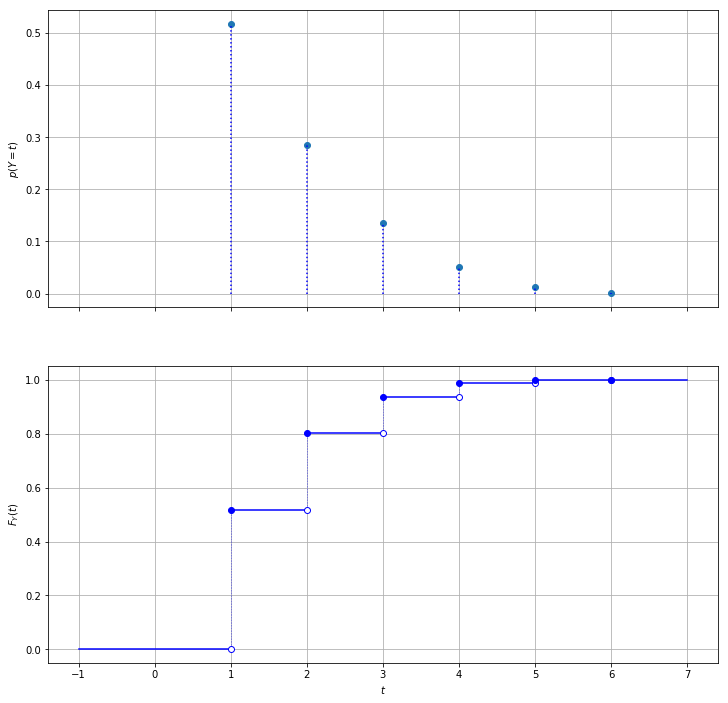

In [115]:
fig,ax = plt.subplots(2,1,figsize=[12,12],sharex=True)
plotPMF(ax[0],np.arange(1,7),pmf)
plotCDF(ax[1],np.arange(1,7),pmf,[-1,7])
ax[0].grid(True)
ax[1].grid(True)

ax[0].set_ylabel('$p(Y=t)$')
ax[1].set_ylabel('$F_Y(t)$')
ax[1].set_xlabel('$t$');


***
## Brute-force computing
This is a fairly small problem, we can create the list of all such 4-tuples,
compute $Y$ or $Z$ for each one, and find the expectation by averaging on $\Omega$

In [2]:
Omega = [] # construct the list Omega of all possible dice rolls
for i in range(6):
    for j in range(6):
        for k in range(6):
            for l in range(6):
                Omega.append((i+1, j+1, k+1, l+1))
                
# Alternative 
from itertools import product
dice = [1,2,3,4,5,6] # or range(1,7)
Omega = list(product(dice,repeat=4))

In [47]:
len(Omega)

1296

## Computing Z(omega)
Create a list Z, same size as Omega, such that Z[k] contains
the value of Z(Omega[k])

In [6]:
# The traditional way - iterate over indices
Z = []
for i in range(len(Omega)):
    Z.append(sum(Omega[i]) - min(Omega[i]))

# Alternatively (a more idiomatic way):
Z = []
for om in Omega: # It will iterate at the same order of Omega (being a list)
    Z.append(sum(om) - min(om))
    
# And the holy grail - list comprehensions    
Z = [sum(om)-min(om) for om in Omega]

In [7]:
import numpy as np
average = np.mean(Z)
var = np.mean((Z - np.mean(Z))**2)
print('mean=',average,' variance=',var)

mean= 12.2445987654  variance= 8.1045232958


In [11]:
I10 = np.where(np.array(Z) == 10)
print(I10) # all the indices in which Z==10
print(Omega[17]) # Indeed the sum of that is 10 !

(array([  17,   22,   27,   32,   47,   52,   57,   62,   67,   77,   82,
         87,   92,   97,  102,  112,  117,  122,  127,  132,  147,  152,
        157,  162,  182,  187,  192,  227,  232,  237,  242,  247,  257,
        263,  268,  273,  278,  282,  283,  292,  298,  303,  308,  312,
        313,  327,  333,  338,  342,  343,  362,  368,  372,  373,  397,
        402,  403,  437,  442,  447,  452,  457,  462,  472,  478,  483,
        488,  492,  493,  507,  513,  519,  522,  523,  524,  542,  548,
        552,  553,  554,  577,  582,  583,  612,  652,  657,  662,  667,
        672,  687,  693,  698,  702,  703,  722,  728,  732,  733,  734,
        757,  762,  763,  792,  867,  872,  877,  882,  902,  908,  912,
        913,  937,  942,  943,  972, 1082, 1087, 1092, 1117, 1122, 1123,
       1152], dtype=int64),)
(1, 1, 3, 6)


PMF of Z:

In [104]:
print(set(Z))
outcome = list(set(Z))
print(outcome)

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [105]:
pmf = []
for k in range(len(set(Z))):
    p = len(np.where(np.array(Z) == outcome[k])[0]) / len(Omega)
    pmf.append(p)

# Alternative
pmf = [len(np.where(np.array(Z) == k)[0]) / len(Omega) for k in outcome]

# Or even simpler
pmf = [Z.count(k) / len(Omega) for k in outcome]

In [106]:
np.sum(pmf)

1.0

Text(0.5, 0, '$t$')

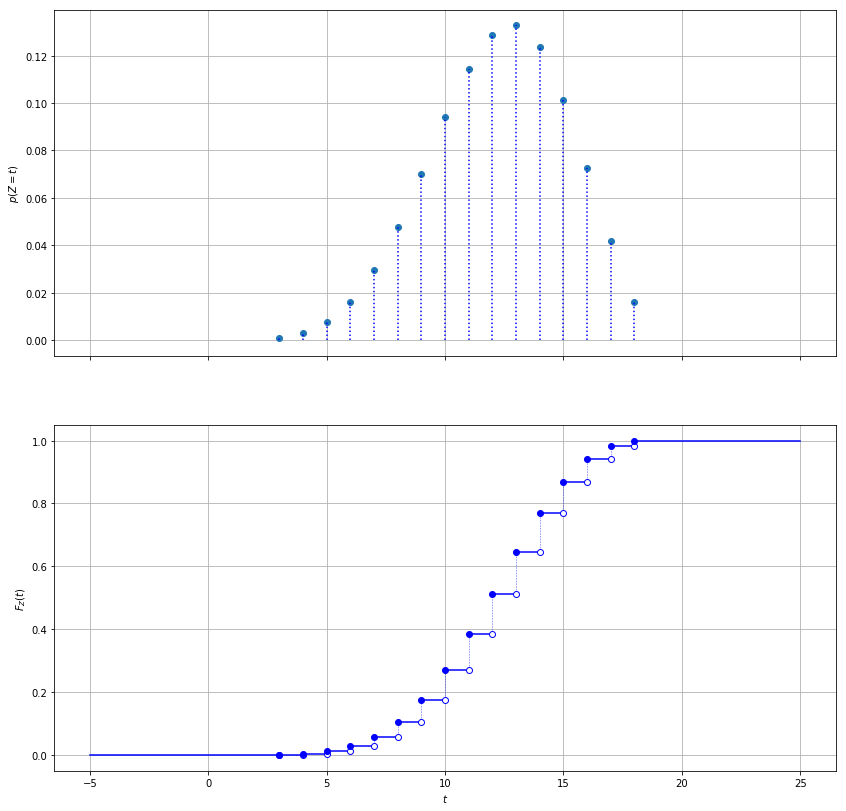

In [112]:
fig,ax = plt.subplots(2,1,figsize=[14,14],sharex=True)
plotPMF(ax[0],np.arange(3,19),pmf)
plotCDF(ax[1],np.arange(3,19),pmf,[-5,25])
ax[0].grid(True)
ax[1].grid(True)

ax[0].set_ylabel('$p(Z=t)$')
ax[1].set_ylabel('$F_Z(t)$')
ax[1].set_xlabel('$t$')
